This Jupyter Notebook performs Exploratory Data Analysis (EDA) as follows:
1. Basic overview: shapes, data types, missing values
2. Descriptive statistics: describe() for numerical columns
3. Box plots: for price, freight_value, payment_value, payment_installments
4. Histograms: distributions for numerical variables
5. Bar charts: for payment types, seller states, order status
6. Pie charts: for payment types and top states
7. Additional analysis: unique values, correlations, detailed statistics
8. Advanced visualizations: seaborn distributions and scatter plots

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Try to import folium for map visualizations
try:
    import folium
    from folium import plugins
    FOLIUM_AVAILABLE = True
except ImportError:
    FOLIUM_AVAILABLE = False
    print("Note: folium is not installed. Install it with: pip install folium")
    print("Geographic visualizations will use alternative methods.")

# Set style for better-looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load datasets (adjust paths as needed)
base_path = '../data/kaggle-raw/'

# Load all datasets
sellers = pd.read_csv(f'{base_path}olist_sellers_dataset.csv')
products = pd.read_csv(f'{base_path}olist_products_dataset.csv')
orders = pd.read_csv(f'{base_path}olist_orders_dataset.csv')
order_items = pd.read_csv(f'{base_path}olist_order_items_dataset.csv')
order_payments = pd.read_csv(f'{base_path}olist_order_payments_dataset.csv')
order_reviews = pd.read_csv(f'{base_path}olist_order_reviews_dataset.csv')
customers = pd.read_csv(f'{base_path}olist_customers_dataset.csv')
category_translation = pd.read_csv(f'{base_path}product_category_name_translation.csv')
geolocation = pd.read_csv(f'{base_path}olist_geolocation_dataset.csv')


1. BASIC DATA OVERVIEW

In [4]:
# Check shape and basic info
print("Dataset Shapes:")
print(f"Sellers: {sellers.shape}")
print(f"Products: {products.shape}")
print(f"Orders: {orders.shape}")
print(f"Order Items: {order_items.shape}")
print(f"Order Payments: {order_payments.shape}")
print(f"Order Reviews: {order_reviews.shape}")
print(f"Customers: {customers.shape}")

Dataset Shapes:
Sellers: (3095, 4)
Products: (32951, 9)
Orders: (99441, 8)
Order Items: (112650, 7)
Order Payments: (103886, 5)
Order Reviews: (99224, 7)
Customers: (99441, 5)


1.1 Check data types

In [5]:
print("Data Types:")
for name, df in [("Sellers", sellers), ("Products", products), 
                 ("Orders", orders), ("Order Items", order_items),
                 ("Order Payments", order_payments), 
                 ("Order Reviews", order_reviews),
                 ("Customers", customers)]:
    print(f"\n{name}:")
    print(df.dtypes)

Data Types:

Sellers:
seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

Products:
product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

Orders:
order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

Order Items:
order_id                object
order_item_id            int64
product_id              object
seller_id      

1.2 Check for missing values

In [6]:
print("Missing Values:")
for name, df in [("Sellers", sellers), ("Products", products), 
                 ("Orders", orders), ("Order Items", order_items),
                 ("Order Payments", order_payments),
                 ("Order Reviews", order_reviews),
                 ("Customers", customers)]:
    print(f"\n{name}:")
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    missing_df = pd.DataFrame({
        'Missing Count': missing,
        'Percentage': missing_pct
    })
    print(missing_df[missing_df['Missing Count'] > 0])

Missing Values:

Sellers:
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []

Products:
                            Missing Count  Percentage
product_category_name                 610    1.851234
product_name_lenght                   610    1.851234
product_description_lenght            610    1.851234
product_photos_qty                    610    1.851234
product_weight_g                        2    0.006070
product_length_cm                       2    0.006070
product_height_cm                       2    0.006070
product_width_cm                        2    0.006070

Orders:
                               Missing Count  Percentage
order_approved_at                        160    0.160899
order_delivered_carrier_date            1783    1.793023
order_delivered_customer_date           2965    2.981668

Order Items:
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []

Order Payments:
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []

Order Reviews:
    

2. DESCRIPTIVE STATISTICS FOR NUMERICAL VARIABLES

In [7]:
# For Order Items dataset (has price and freight_value)
print("Order Items - Descriptive Statistics:")
print(order_items.describe())

# For Order Payments dataset
print("\n" + "="*50)
print("Order Payments - Descriptive Statistics:")
print(order_payments.describe())

# For Products dataset (check for numerical columns)
print("\n" + "="*50)
print("Products - Descriptive Statistics:")
print(products.describe())

Order Items - Descriptive Statistics:
       order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000      16.260000
75%         1.000000     134.900000      21.150000
max        21.000000    6735.000000     409.680000

Order Payments - Descriptive Statistics:
       payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1.0

3. BOX PLOTS FOR NUMERICAL VARIABLES

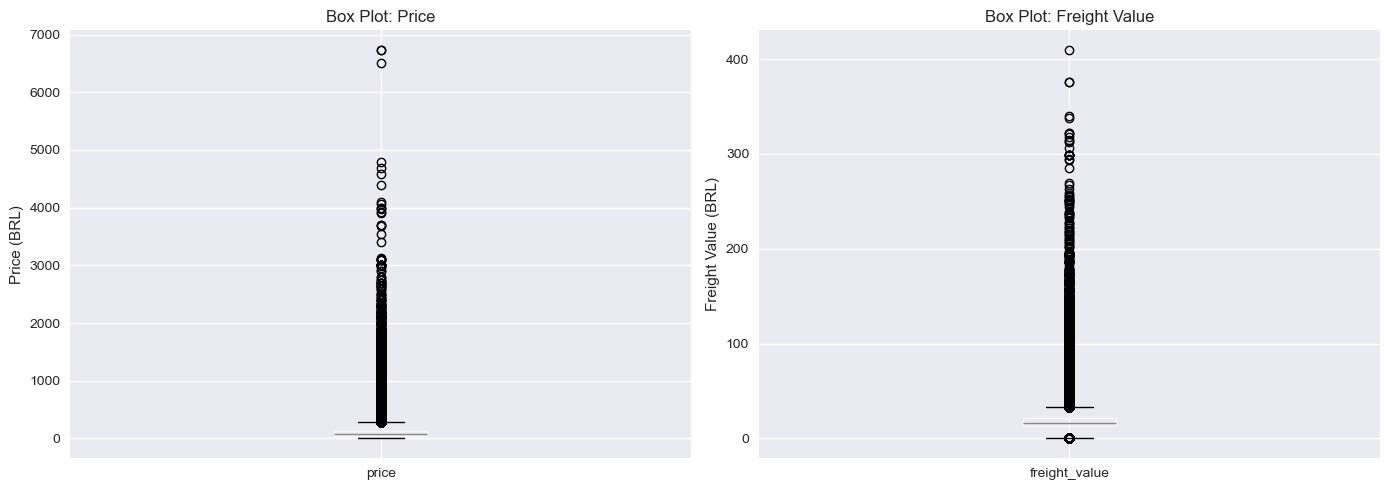

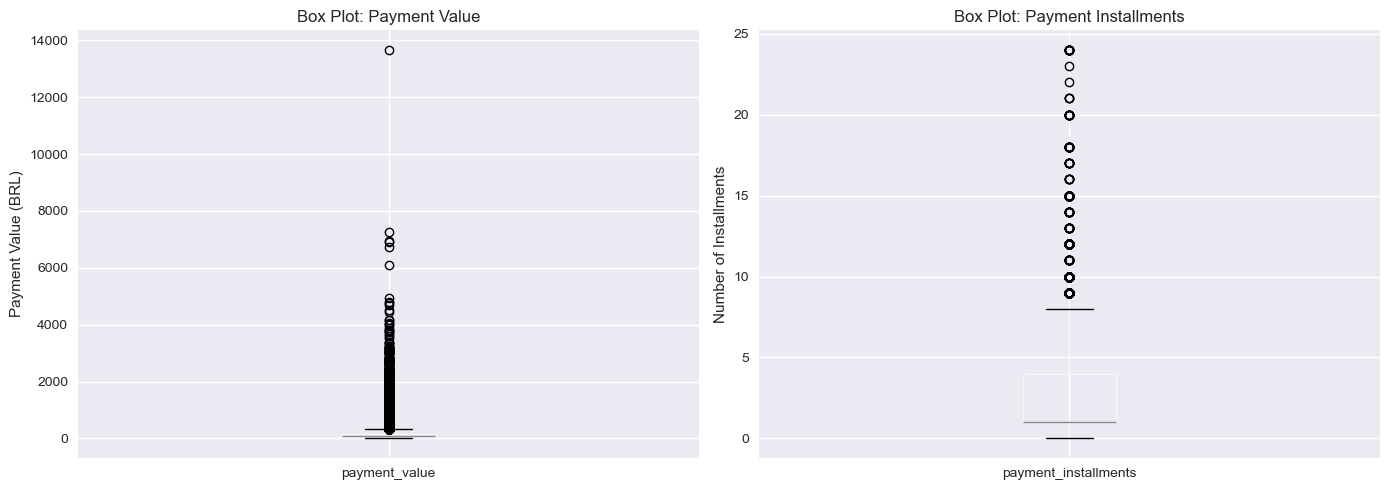

In [8]:
# Order Items - Price and Freight Value
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

order_items.boxplot(column='price', ax=axes[0])
axes[0].set_title('Box Plot: Price')
axes[0].set_ylabel('Price (BRL)')

order_items.boxplot(column='freight_value', ax=axes[1])
axes[1].set_title('Box Plot: Freight Value')
axes[1].set_ylabel('Freight Value (BRL)')

plt.tight_layout()
plt.show()

# Order Payments - Payment Value and Installments
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

order_payments.boxplot(column='payment_value', ax=axes[0])
axes[0].set_title('Box Plot: Payment Value')
axes[0].set_ylabel('Payment Value (BRL)')

order_payments.boxplot(column='payment_installments', ax=axes[1])
axes[1].set_title('Box Plot: Payment Installments')
axes[1].set_ylabel('Number of Installments')

plt.tight_layout()
plt.show()

4. HISTOGRAMS FOR NUMERICAL VARIABLES

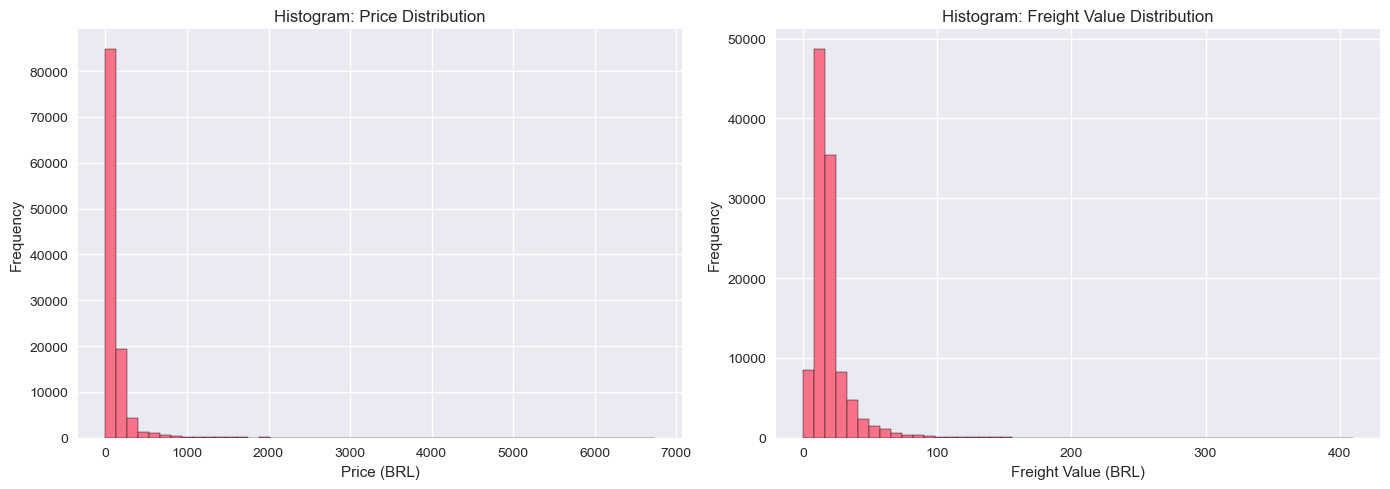

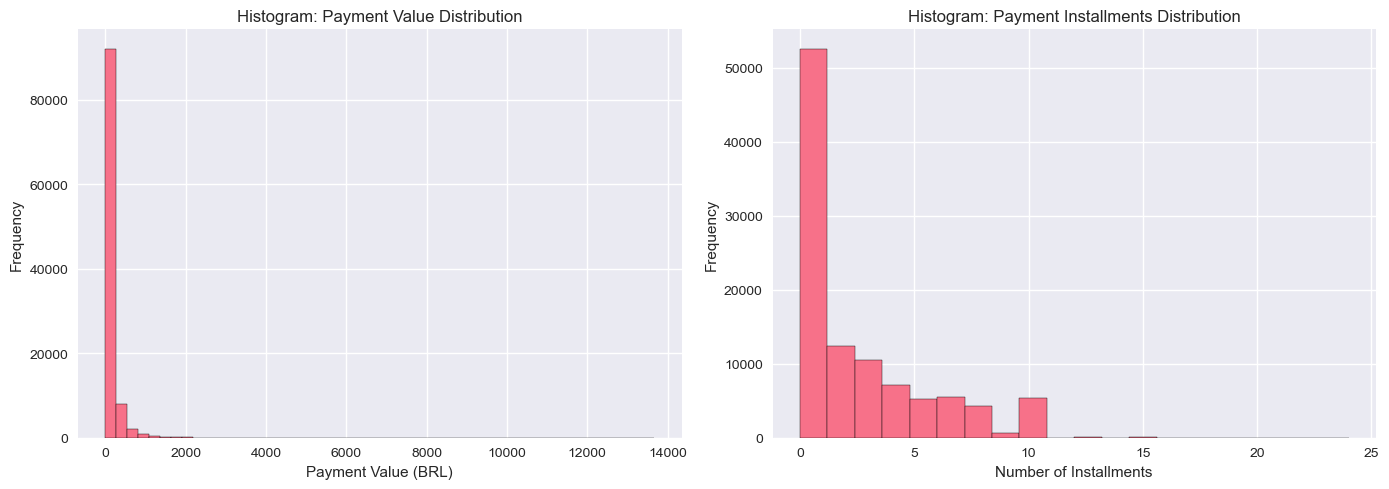

In [9]:
# Order Items
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

order_items['price'].hist(bins=50, ax=axes[0], edgecolor='black')
axes[0].set_title('Histogram: Price Distribution')
axes[0].set_xlabel('Price (BRL)')
axes[0].set_ylabel('Frequency')

order_items['freight_value'].hist(bins=50, ax=axes[1], edgecolor='black')
axes[1].set_title('Histogram: Freight Value Distribution')
axes[1].set_xlabel('Freight Value (BRL)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Order Payments
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

order_payments['payment_value'].hist(bins=50, ax=axes[0], edgecolor='black')
axes[0].set_title('Histogram: Payment Value Distribution')
axes[0].set_xlabel('Payment Value (BRL)')
axes[0].set_ylabel('Frequency')

order_payments['payment_installments'].hist(bins=20, ax=axes[1], edgecolor='black')
axes[1].set_title('Histogram: Payment Installments Distribution')
axes[1].set_xlabel('Number of Installments')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


5. BAR CHARTS FOR CATEGORICAL VARIABLES

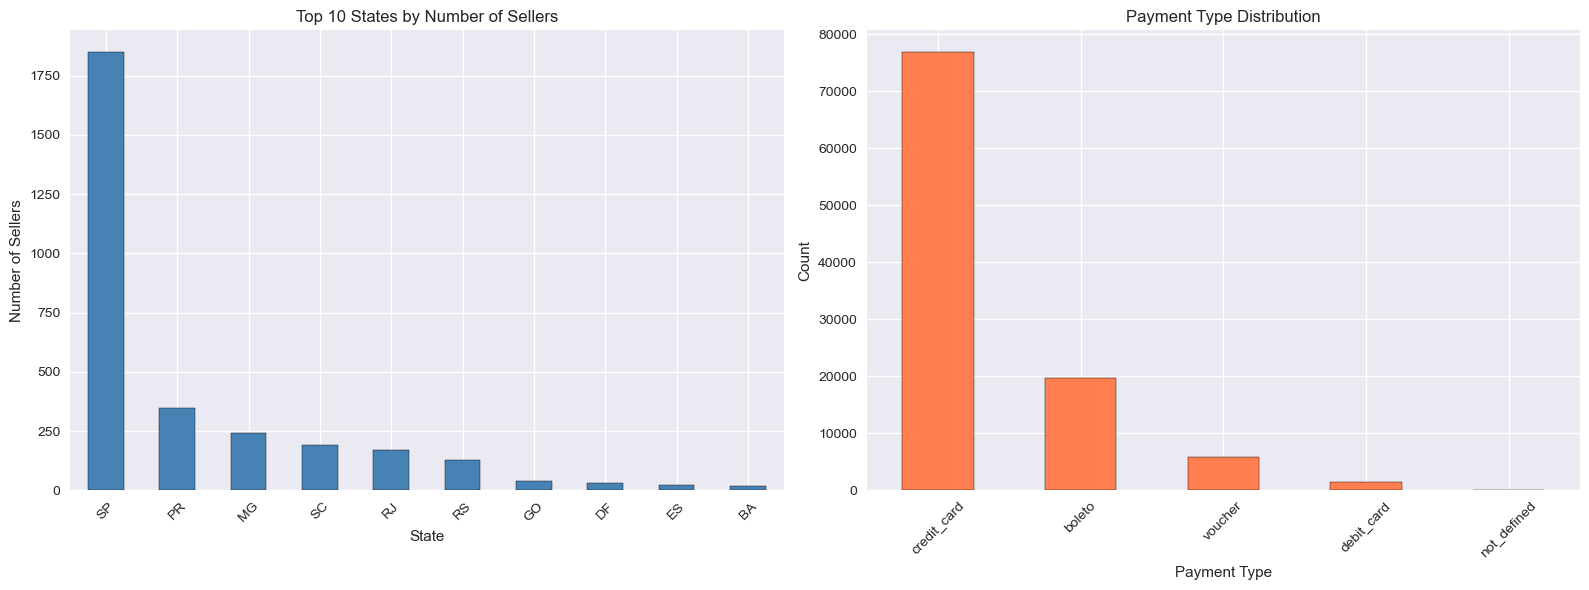

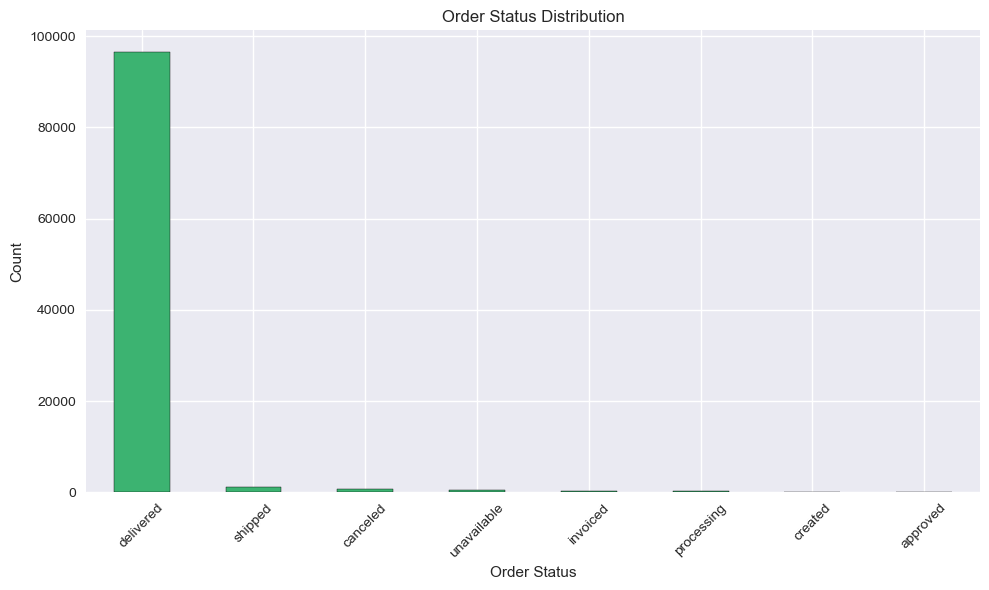

In [10]:
# Sellers - State distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

state_counts = sellers['seller_state'].value_counts().head(10)
state_counts.plot(kind='bar', ax=axes[0], color='steelblue', edgecolor='black')
axes[0].set_title('Top 10 States by Number of Sellers')
axes[0].set_xlabel('State')
axes[0].set_ylabel('Number of Sellers')
axes[0].tick_params(axis='x', rotation=45)

# Order Payments - Payment Type
payment_type_counts = order_payments['payment_type'].value_counts()
payment_type_counts.plot(kind='bar', ax=axes[1], color='coral', edgecolor='black')
axes[1].set_title('Payment Type Distribution')
axes[1].set_xlabel('Payment Type')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Orders - Order Status (if available)
if 'order_status' in orders.columns:
    fig, ax = plt.subplots(figsize=(10, 6))
    status_counts = orders['order_status'].value_counts()
    status_counts.plot(kind='bar', ax=ax, color='mediumseagreen', edgecolor='black')
    ax.set_title('Order Status Distribution')
    ax.set_xlabel('Order Status')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()

6. PIE CHARTS FOR CATEGORICAL VARIABLES

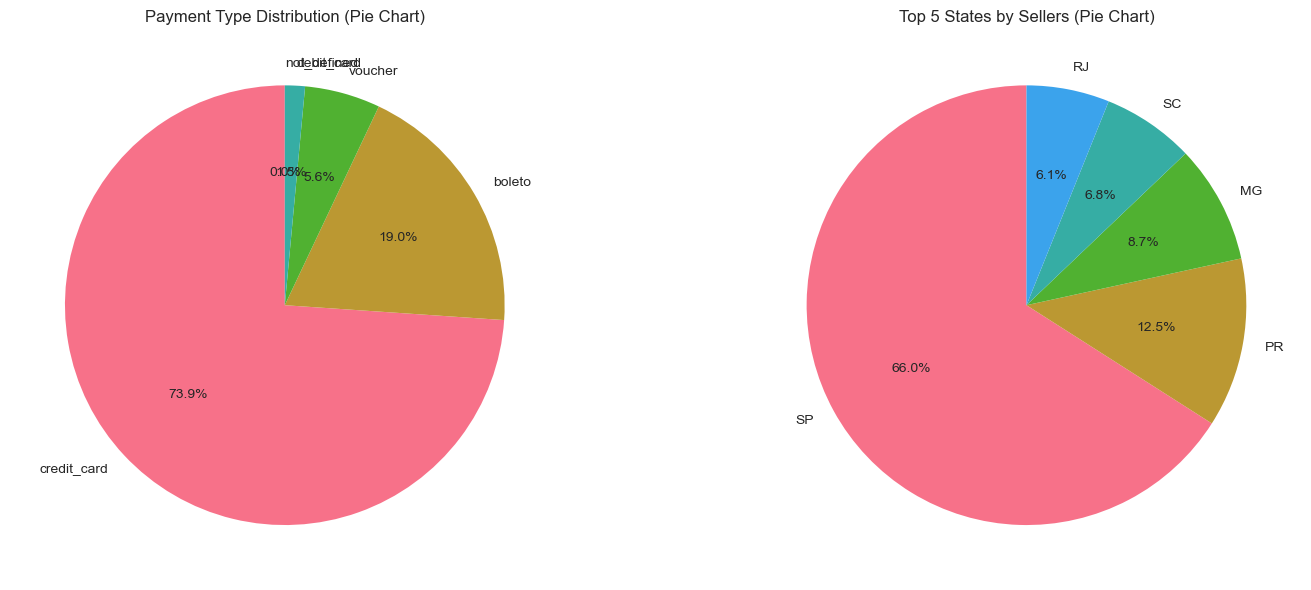

In [11]:
# Payment Type Pie Chart
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

payment_type_counts = order_payments['payment_type'].value_counts()
axes[0].pie(payment_type_counts.values, labels=payment_type_counts.index, 
            autopct='%1.1f%%', startangle=90)
axes[0].set_title('Payment Type Distribution (Pie Chart)')

# Seller State (Top 5)
state_counts_top5 = sellers['seller_state'].value_counts().head(5)
axes[1].pie(state_counts_top5.values, labels=state_counts_top5.index, 
            autopct='%1.1f%%', startangle=90)
axes[1].set_title('Top 5 States by Sellers (Pie Chart)')

plt.tight_layout()
plt.show()

7. ADDITIONAL EXPLORATORY ANALYSIS

In [12]:
# Check unique values in categorical columns
print("\n" + "="*50)
print("Unique Values in Categorical Columns:")

print(f"\nPayment Types: {order_payments['payment_type'].unique()}")
print(f"\nNumber of unique sellers: {sellers['seller_id'].nunique()}")
print(f"Number of unique products: {products['product_id'].nunique()}")
print(f"Number of unique orders: {orders['order_id'].nunique()}")
print(f"Number of unique customers: {customers['customer_id'].nunique()}")

# Summary statistics with more detail
print("\n" + "="*50)
print("Detailed Summary Statistics:")
print("\nOrder Items - Price:")
print(f"  Mean: {order_items['price'].mean():.2f}")
print(f"  Median: {order_items['price'].median():.2f}")
print(f"  Std: {order_items['price'].std():.2f}")
print(f"  Min: {order_items['price'].min():.2f}")
print(f"  Max: {order_items['price'].max():.2f}")
print(f"  25th percentile: {order_items['price'].quantile(0.25):.2f}")
print(f"  75th percentile: {order_items['price'].quantile(0.75):.2f}")

# Correlation matrix for numerical variables (if multiple exist)
print("\n" + "="*50)
print("Correlation Matrix (Order Items):")
print(order_items[['price', 'freight_value']].corr())


Unique Values in Categorical Columns:

Payment Types: ['credit_card' 'boleto' 'voucher' 'debit_card' 'not_defined']

Number of unique sellers: 3095
Number of unique products: 32951
Number of unique orders: 99441
Number of unique customers: 99441

Detailed Summary Statistics:

Order Items - Price:
  Mean: 120.65
  Median: 74.99
  Std: 183.63
  Min: 0.85
  Max: 6735.00
  25th percentile: 39.90
  75th percentile: 134.90

Correlation Matrix (Order Items):
                  price  freight_value
price          1.000000       0.414204
freight_value  0.414204       1.000000


8. ADVANCED VISUALIZATIONS

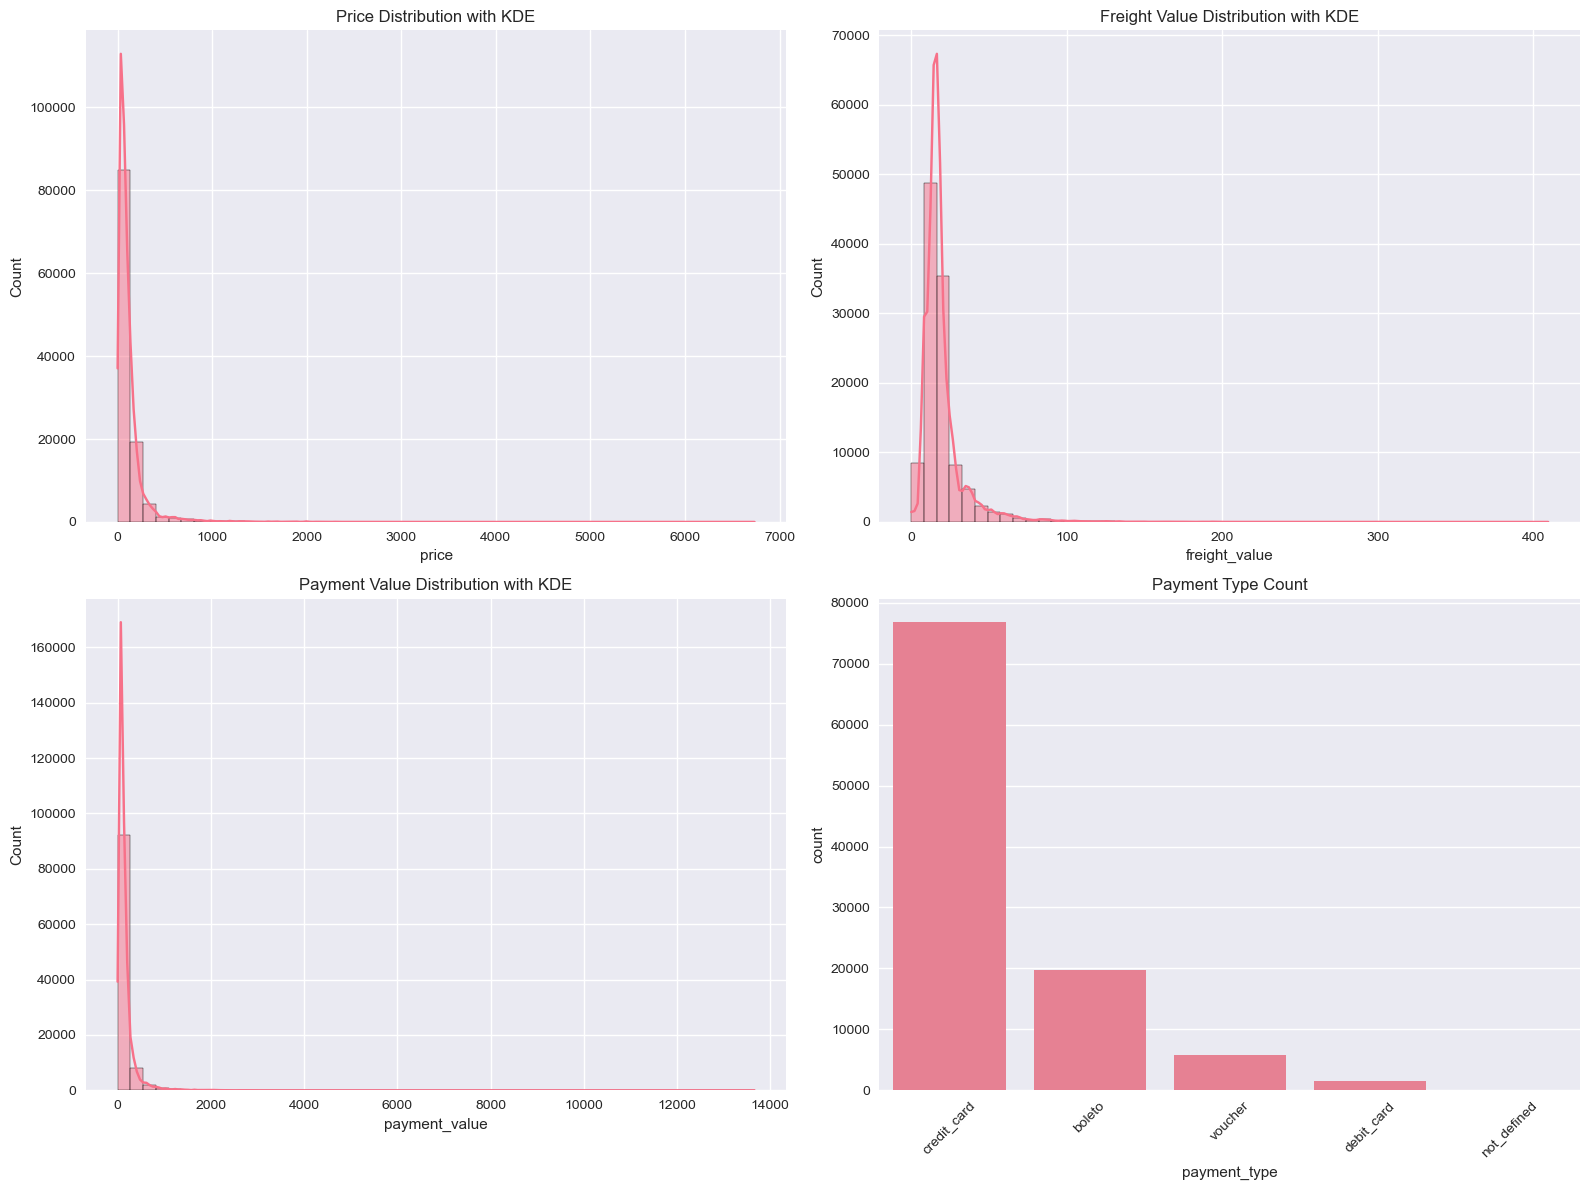

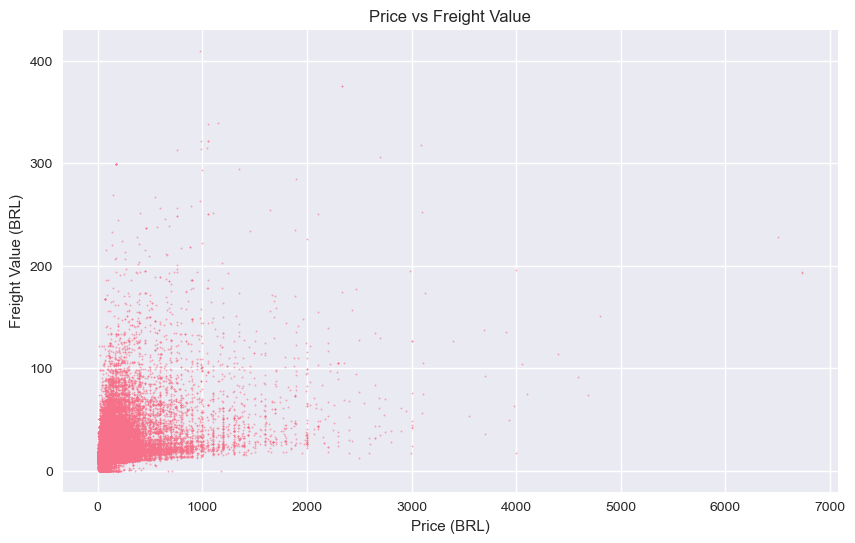

In [13]:
# Distribution plots using seaborn
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.histplot(order_items['price'], bins=50, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Price Distribution with KDE')

sns.histplot(order_items['freight_value'], bins=50, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Freight Value Distribution with KDE')

sns.histplot(order_payments['payment_value'], bins=50, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Payment Value Distribution with KDE')

sns.countplot(data=order_payments, x='payment_type', ax=axes[1, 1])
axes[1, 1].set_title('Payment Type Count')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Scatter plot: Price vs Freight Value
plt.figure(figsize=(10, 6))
plt.scatter(order_items['price'], order_items['freight_value'], alpha=0.5, s=1)
plt.xlabel('Price (BRL)')
plt.ylabel('Freight Value (BRL)')
plt.title('Price vs Freight Value')
plt.show()

9. ORDER REVIEWS ANALYSIS


In [14]:
# Order Reviews - Descriptive Statistics
print("Order Reviews - Descriptive Statistics:")
print(order_reviews.describe())

# Review Score Distribution
print("\n" + "="*50)
print("Review Score Distribution:")
print(order_reviews['review_score'].value_counts().sort_index())


Order Reviews - Descriptive Statistics:
       review_score
count  99224.000000
mean       4.086421
std        1.347579
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000

Review Score Distribution:
review_score
1    11424
2     3151
3     8179
4    19142
5    57328
Name: count, dtype: int64


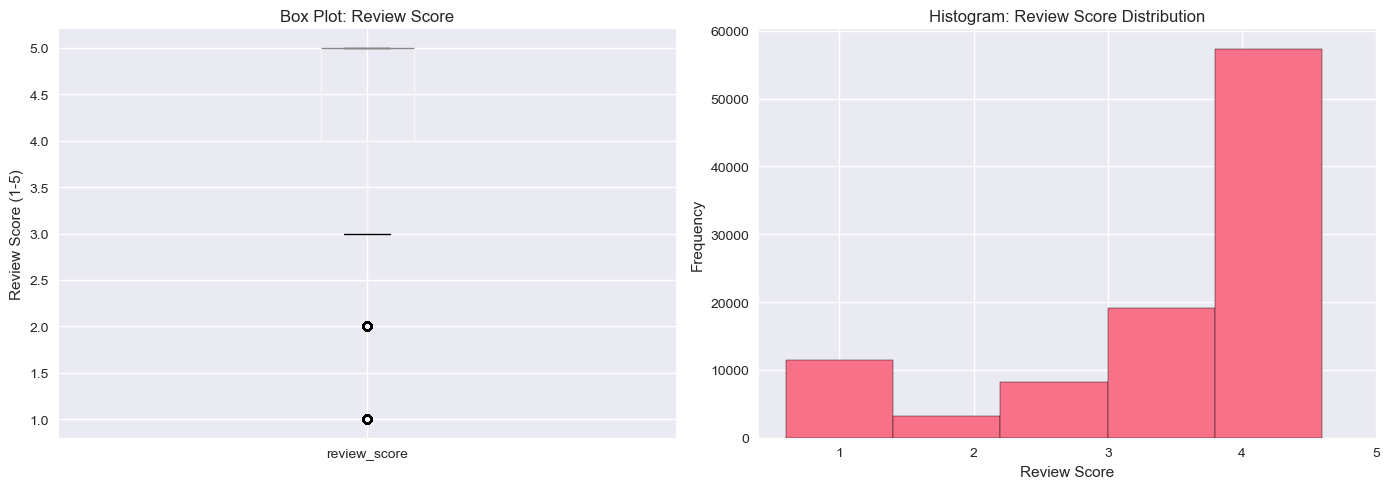

In [15]:
# Review Score - Box Plot and Histogram
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

order_reviews.boxplot(column='review_score', ax=axes[0])
axes[0].set_title('Box Plot: Review Score')
axes[0].set_ylabel('Review Score (1-5)')

order_reviews['review_score'].hist(bins=5, ax=axes[1], edgecolor='black', align='left')
axes[1].set_title('Histogram: Review Score Distribution')
axes[1].set_xlabel('Review Score')
axes[1].set_ylabel('Frequency')
axes[1].set_xticks([1, 2, 3, 4, 5])

plt.tight_layout()
plt.show()


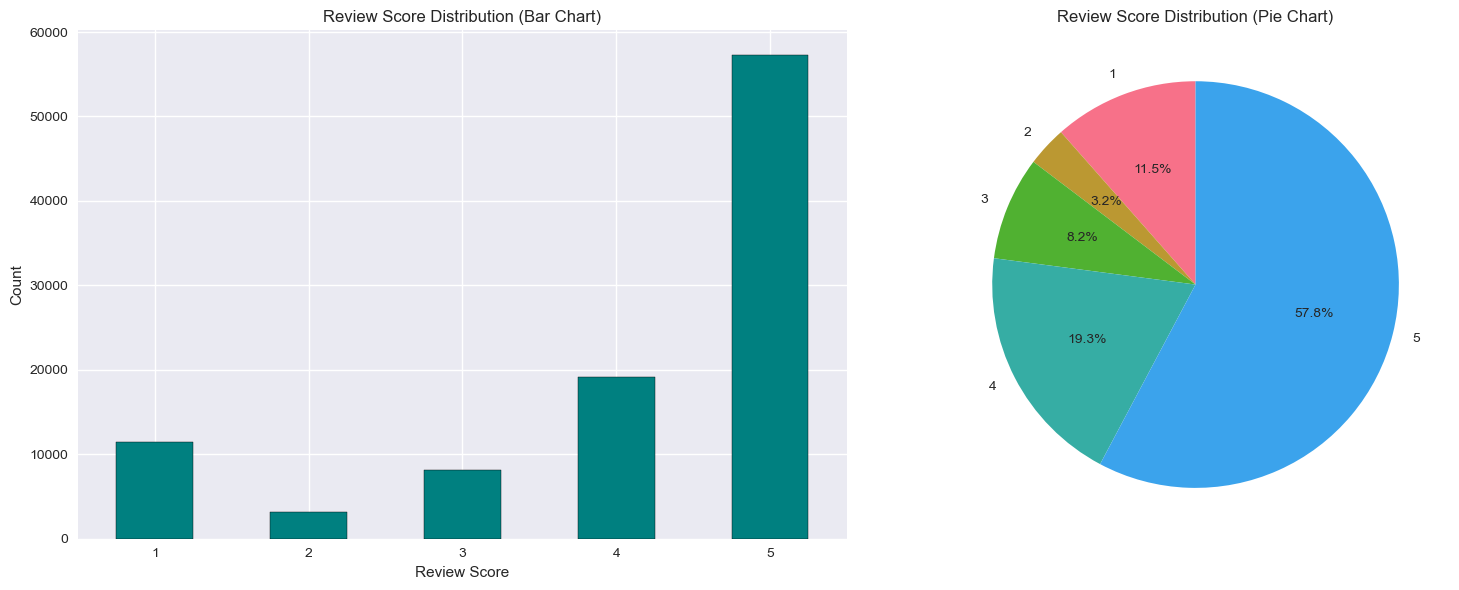

In [16]:
# Review Score - Bar Chart and Pie Chart
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

review_score_counts = order_reviews['review_score'].value_counts().sort_index()
review_score_counts.plot(kind='bar', ax=axes[0], color='teal', edgecolor='black')
axes[0].set_title('Review Score Distribution (Bar Chart)')
axes[0].set_xlabel('Review Score')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

axes[1].pie(review_score_counts.values, labels=review_score_counts.index, 
            autopct='%1.1f%%', startangle=90)
axes[1].set_title('Review Score Distribution (Pie Chart)')

plt.tight_layout()
plt.show()


10. CUSTOMERS ANALYSIS


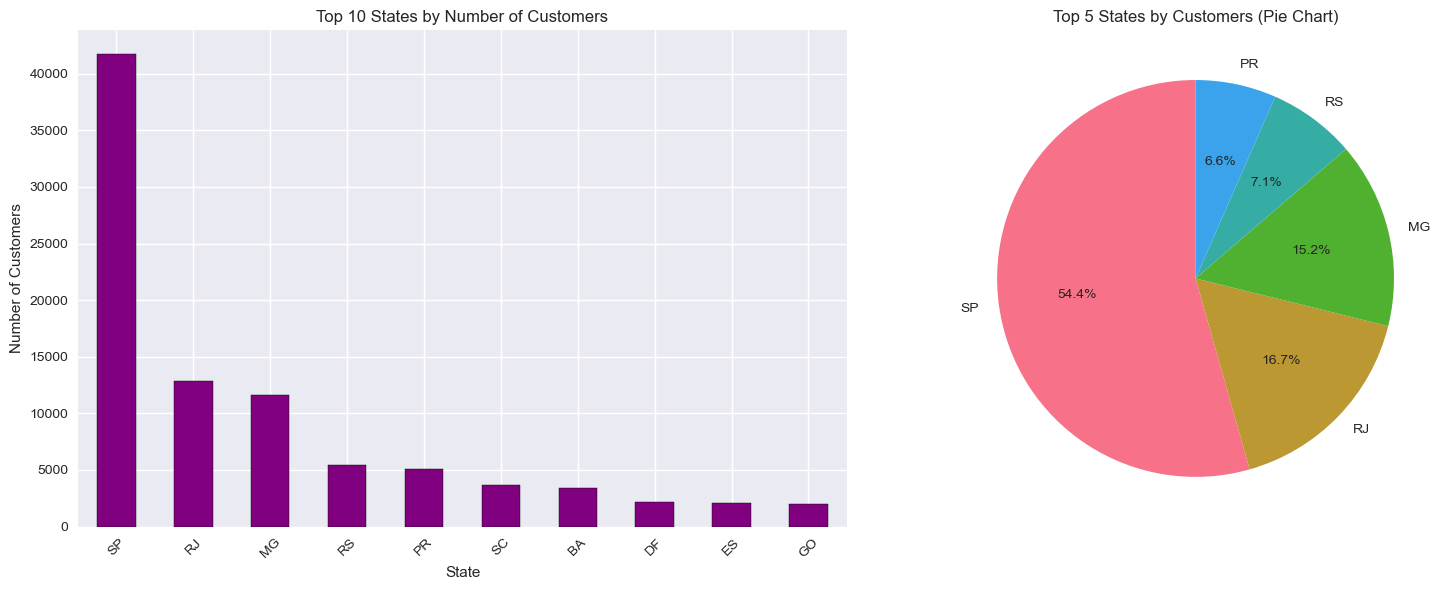

In [17]:
# Customers - State Distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

customer_state_counts = customers['customer_state'].value_counts().head(10)
customer_state_counts.plot(kind='bar', ax=axes[0], color='purple', edgecolor='black')
axes[0].set_title('Top 10 States by Number of Customers')
axes[0].set_xlabel('State')
axes[0].set_ylabel('Number of Customers')
axes[0].tick_params(axis='x', rotation=45)

# Top 5 States Pie Chart
customer_state_top5 = customers['customer_state'].value_counts().head(5)
axes[1].pie(customer_state_top5.values, labels=customer_state_top5.index, 
            autopct='%1.1f%%', startangle=90)
axes[1].set_title('Top 5 States by Customers (Pie Chart)')

plt.tight_layout()
plt.show()


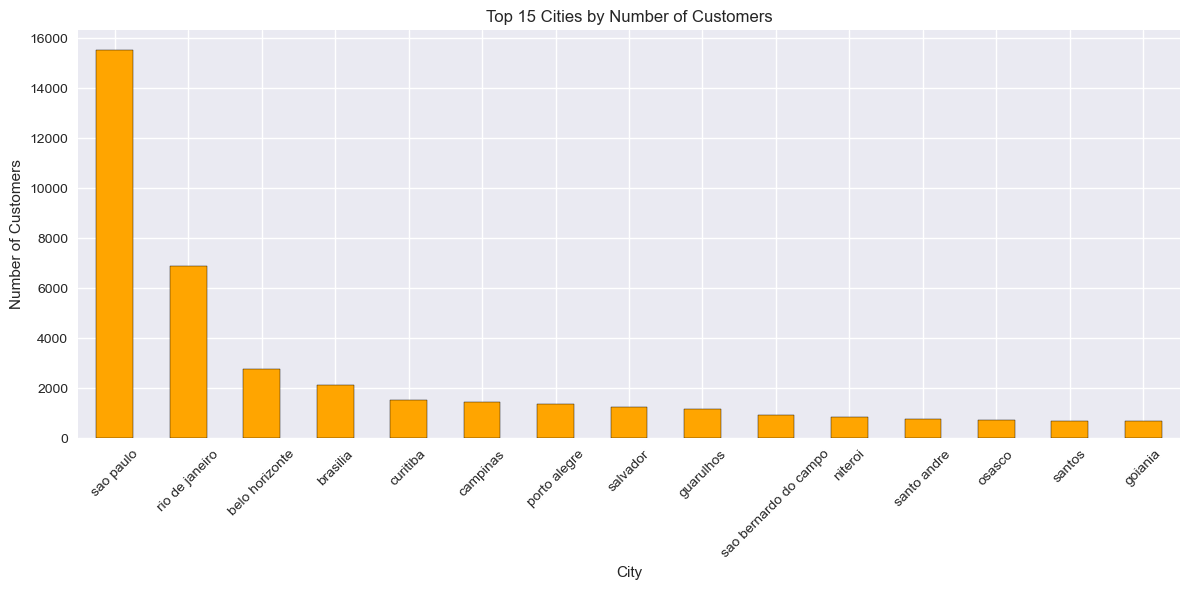

In [18]:
# Customers - Top Cities
fig, ax = plt.subplots(figsize=(12, 6))

customer_city_counts = customers['customer_city'].value_counts().head(15)
customer_city_counts.plot(kind='bar', ax=ax, color='orange', edgecolor='black')
ax.set_title('Top 15 Cities by Number of Customers')
ax.set_xlabel('City')
ax.set_ylabel('Number of Customers')
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


11. PRODUCTS - ADDITIONAL ANALYSIS


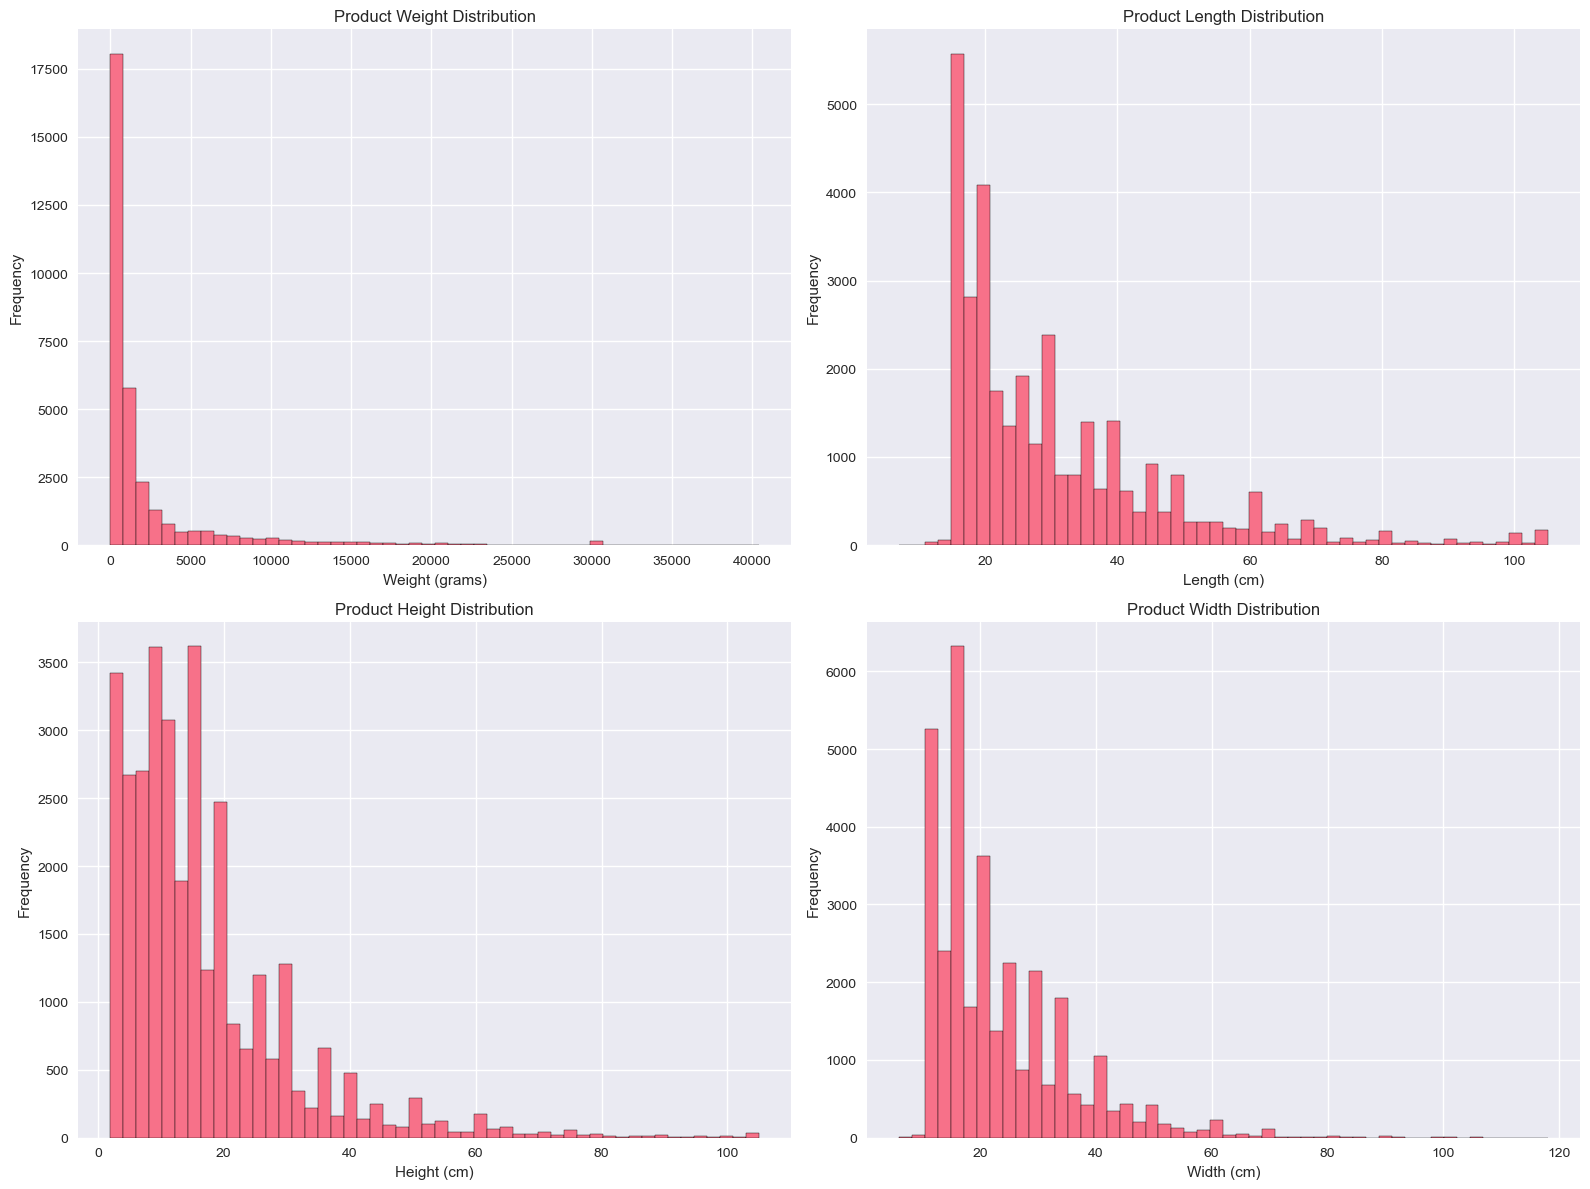

In [19]:
# Products - Dimensions and Weight Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

products['product_weight_g'].hist(bins=50, ax=axes[0, 0], edgecolor='black')
axes[0, 0].set_title('Product Weight Distribution')
axes[0, 0].set_xlabel('Weight (grams)')
axes[0, 0].set_ylabel('Frequency')

products['product_length_cm'].hist(bins=50, ax=axes[0, 1], edgecolor='black')
axes[0, 1].set_title('Product Length Distribution')
axes[0, 1].set_xlabel('Length (cm)')
axes[0, 1].set_ylabel('Frequency')

products['product_height_cm'].hist(bins=50, ax=axes[1, 0], edgecolor='black')
axes[1, 0].set_title('Product Height Distribution')
axes[1, 0].set_xlabel('Height (cm)')
axes[1, 0].set_ylabel('Frequency')

products['product_width_cm'].hist(bins=50, ax=axes[1, 1], edgecolor='black')
axes[1, 1].set_title('Product Width Distribution')
axes[1, 1].set_xlabel('Width (cm)')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


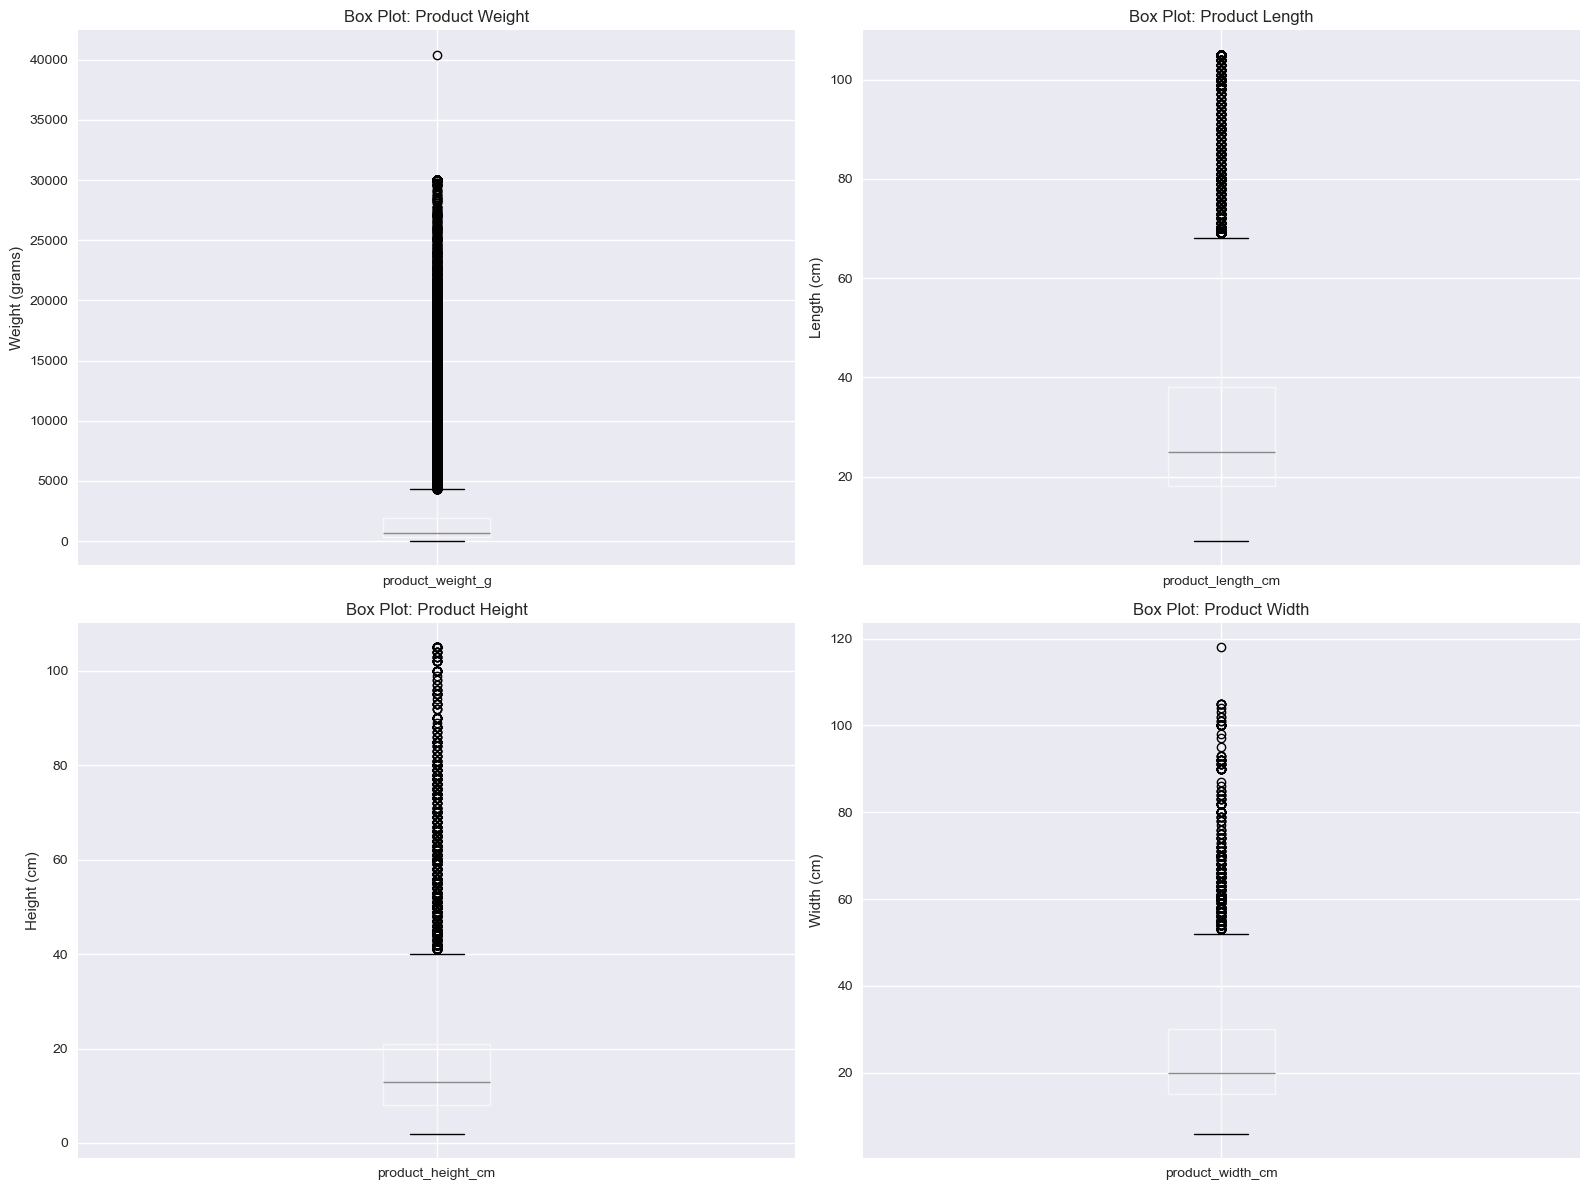

In [20]:
# Products - Box Plots for Dimensions
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

products.boxplot(column='product_weight_g', ax=axes[0, 0])
axes[0, 0].set_title('Box Plot: Product Weight')
axes[0, 0].set_ylabel('Weight (grams)')

products.boxplot(column='product_length_cm', ax=axes[0, 1])
axes[0, 1].set_title('Box Plot: Product Length')
axes[0, 1].set_ylabel('Length (cm)')

products.boxplot(column='product_height_cm', ax=axes[1, 0])
axes[1, 0].set_title('Box Plot: Product Height')
axes[1, 0].set_ylabel('Height (cm)')

products.boxplot(column='product_width_cm', ax=axes[1, 1])
axes[1, 1].set_title('Box Plot: Product Width')
axes[1, 1].set_ylabel('Width (cm)')

plt.tight_layout()
plt.show()


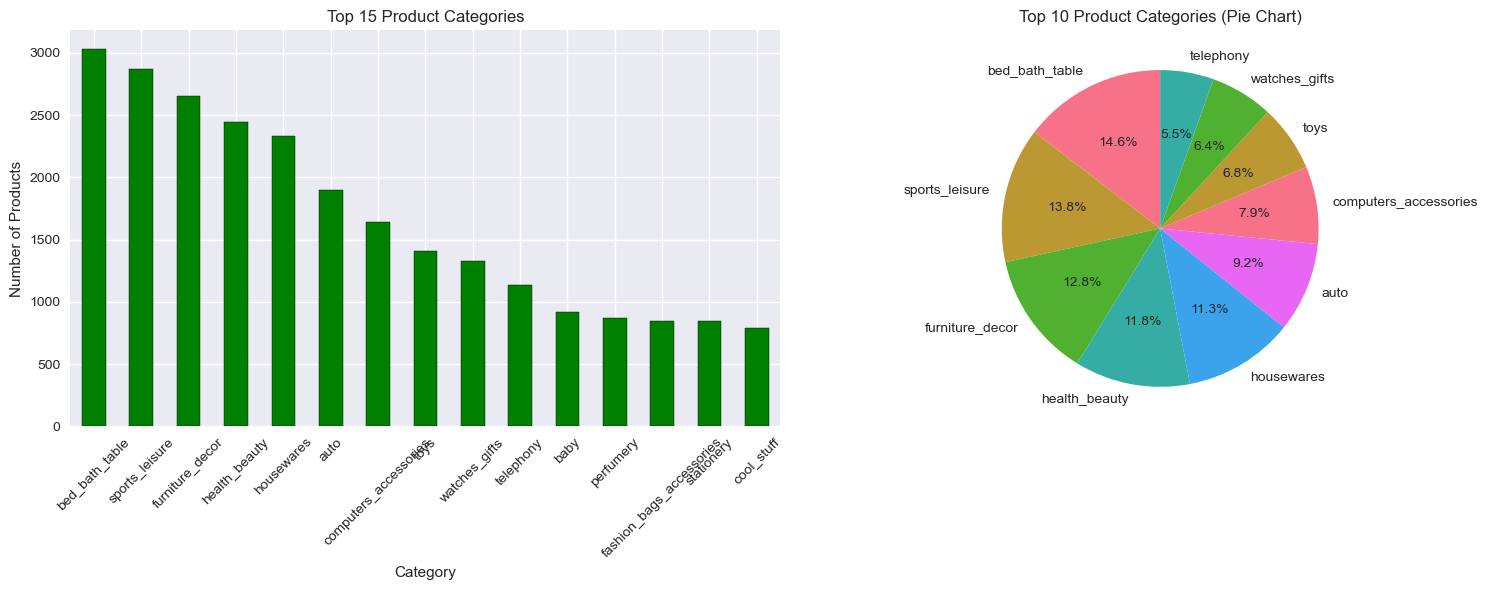

In [21]:
# Product Categories Analysis
# Merge with translation for English names
# Note: category_translation has a 'product_id' column that's not the actual product ID
# So we'll only select the columns we need from category_translation
category_translation_subset = category_translation[['product_category_name', 'product_category_name_english']].drop_duplicates()

products_with_category = products.merge(
    category_translation_subset, 
    on='product_category_name', 
    how='left'
)

# Top Product Categories
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

category_counts = products_with_category['product_category_name_english'].value_counts().head(15)
category_counts.plot(kind='bar', ax=axes[0], color='green', edgecolor='black')
axes[0].set_title('Top 15 Product Categories')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Number of Products')
axes[0].tick_params(axis='x', rotation=45)

# Top 10 Categories Pie Chart
category_top10 = products_with_category['product_category_name_english'].value_counts().head(10)
axes[1].pie(category_top10.values, labels=category_top10.index, 
            autopct='%1.1f%%', startangle=90)
axes[1].set_title('Top 10 Product Categories (Pie Chart)')

plt.tight_layout()
plt.show()


12. TIME-BASED ANALYSIS (ORDERS)


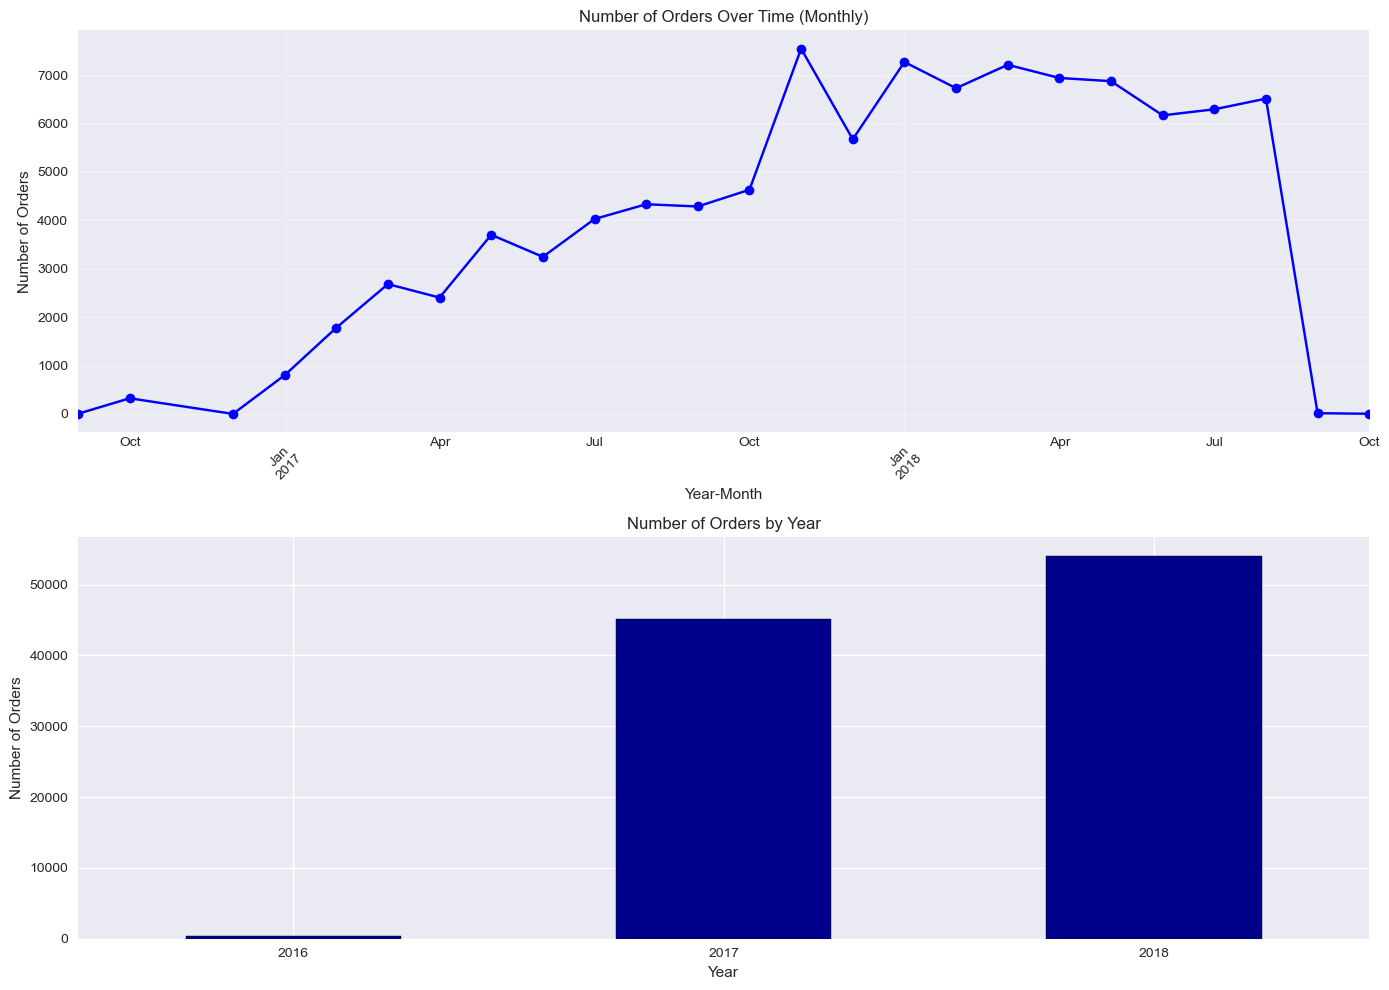

In [22]:
# Convert date columns to datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'], errors='coerce')
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'], errors='coerce')

# Extract year and month
orders['order_year_month'] = orders['order_purchase_timestamp'].dt.to_period('M')
orders['order_year'] = orders['order_purchase_timestamp'].dt.year
orders['order_month'] = orders['order_purchase_timestamp'].dt.month

# Orders over time
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Orders by year-month
orders_by_month = orders['order_year_month'].value_counts().sort_index()
orders_by_month.plot(kind='line', ax=axes[0], marker='o', color='blue')
axes[0].set_title('Number of Orders Over Time (Monthly)')
axes[0].set_xlabel('Year-Month')
axes[0].set_ylabel('Number of Orders')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)

# Orders by year
orders_by_year = orders['order_year'].value_counts().sort_index()
orders_by_year.plot(kind='bar', ax=axes[1], color='darkblue', edgecolor='black')
axes[1].set_title('Number of Orders by Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Orders')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


In [ ]:
# Sales over time analysis
# Merge orders with payments to get sales data
orders_with_sales = orders.merge(
    order_payments.groupby('order_id')['payment_value'].sum().reset_index(),
    on='order_id',
    how='left'
)

# Calculate sales by month
sales_by_month = orders_with_sales.groupby('order_year_month')['payment_value'].sum()

# Create sales over time plot
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Sales by year-month (line plot)
sales_by_month.plot(kind='line', ax=axes[0], marker='o', color='green', linewidth=2, markersize=6)
axes[0].set_title('Total Sales Over Time (Monthly)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Year-Month', fontsize=12)
axes[0].set_ylabel('Total Sales (BRL)', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)
axes[0].set_ylim(bottom=0)

# Format y-axis to show currency
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'R$ {x:,.0f}'))

# Sales by year (bar chart)
sales_by_year = orders_with_sales.groupby('order_year')['payment_value'].sum()
sales_by_year.plot(kind='bar', ax=axes[1], color='darkgreen', edgecolor='black')
axes[1].set_title('Total Sales by Year', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Year', fontsize=12)
axes[1].set_ylabel('Total Sales (BRL)', fontsize=12)
axes[1].tick_params(axis='x', rotation=0)
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'R$ {x:,.0f}'))
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\nSales Over Time Summary:")
print(f"  Total Sales: R$ {orders_with_sales['payment_value'].sum():,.2f}")
print(f"  Average Monthly Sales: R$ {sales_by_month.mean():,.2f}")
print(f"  Peak Month: {sales_by_month.idxmax()} (R$ {sales_by_month.max():,.2f})")
print(f"  Lowest Month: {sales_by_month.idxmin()} (R$ {sales_by_month.min():,.2f})")


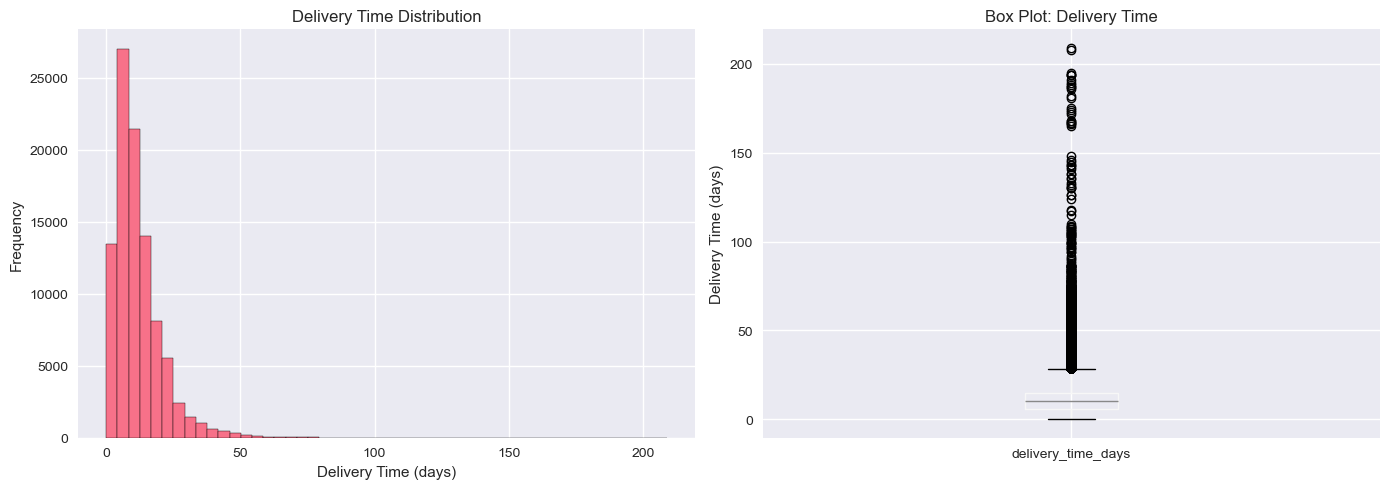


Delivery Time Statistics:
  Mean: 12.09 days
  Median: 10.00 days
  Std: 9.55 days
  Min: 0 days
  Max: 209 days


In [23]:
# Calculate delivery time (days)
orders['delivery_time_days'] = (
    orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']
).dt.days

# Delivery time analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram of delivery time
delivery_time_clean = orders['delivery_time_days'].dropna()
delivery_time_clean.hist(bins=50, ax=axes[0], edgecolor='black')
axes[0].set_title('Delivery Time Distribution')
axes[0].set_xlabel('Delivery Time (days)')
axes[0].set_ylabel('Frequency')

# Box plot of delivery time
orders.boxplot(column='delivery_time_days', ax=axes[1])
axes[1].set_title('Box Plot: Delivery Time')
axes[1].set_ylabel('Delivery Time (days)')

plt.tight_layout()
plt.show()

print(f"\nDelivery Time Statistics:")
print(f"  Mean: {delivery_time_clean.mean():.2f} days")
print(f"  Median: {delivery_time_clean.median():.2f} days")
print(f"  Std: {delivery_time_clean.std():.2f} days")
print(f"  Min: {delivery_time_clean.min():.0f} days")
print(f"  Max: {delivery_time_clean.max():.0f} days")


13. COMPARATIVE ANALYSIS


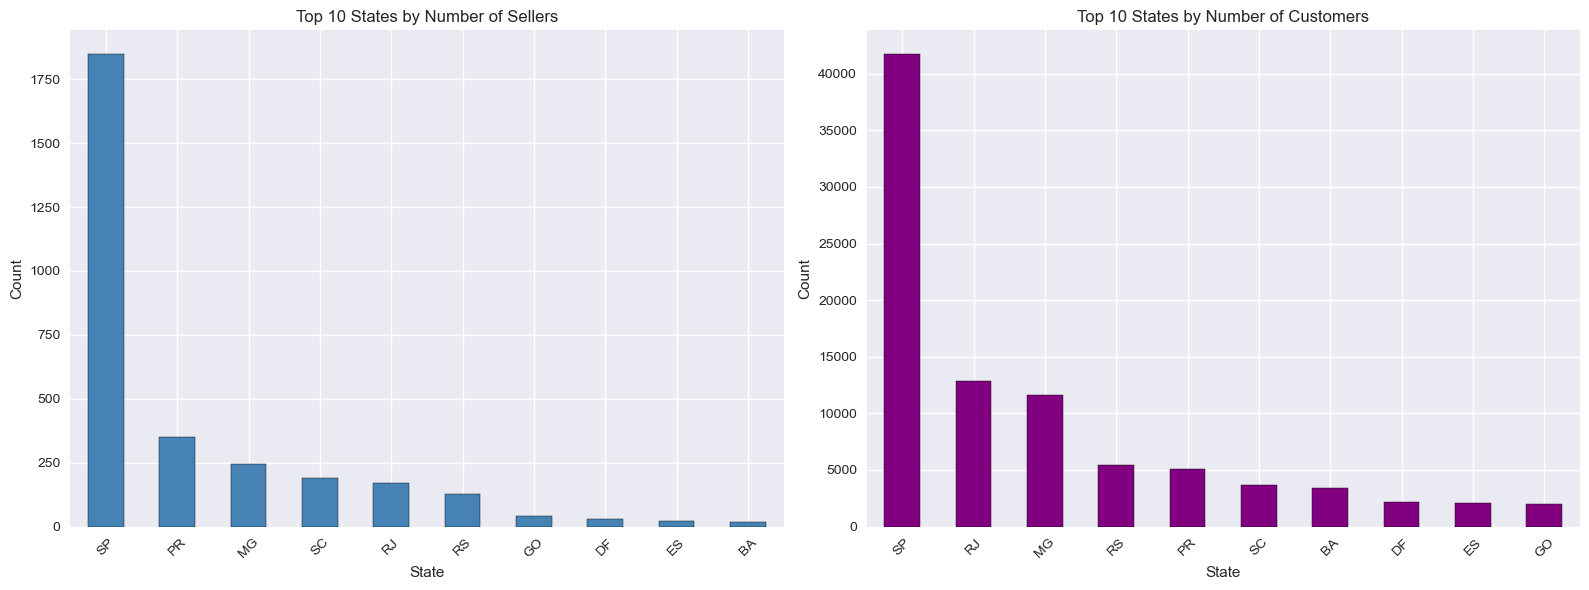

In [24]:
# Compare Seller States vs Customer States
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

seller_state_counts = sellers['seller_state'].value_counts().head(10)
customer_state_counts = customers['customer_state'].value_counts().head(10)

seller_state_counts.plot(kind='bar', ax=axes[0], color='steelblue', edgecolor='black')
axes[0].set_title('Top 10 States by Number of Sellers')
axes[0].set_xlabel('State')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

customer_state_counts.plot(kind='bar', ax=axes[1], color='purple', edgecolor='black')
axes[1].set_title('Top 10 States by Number of Customers')
axes[1].set_xlabel('State')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


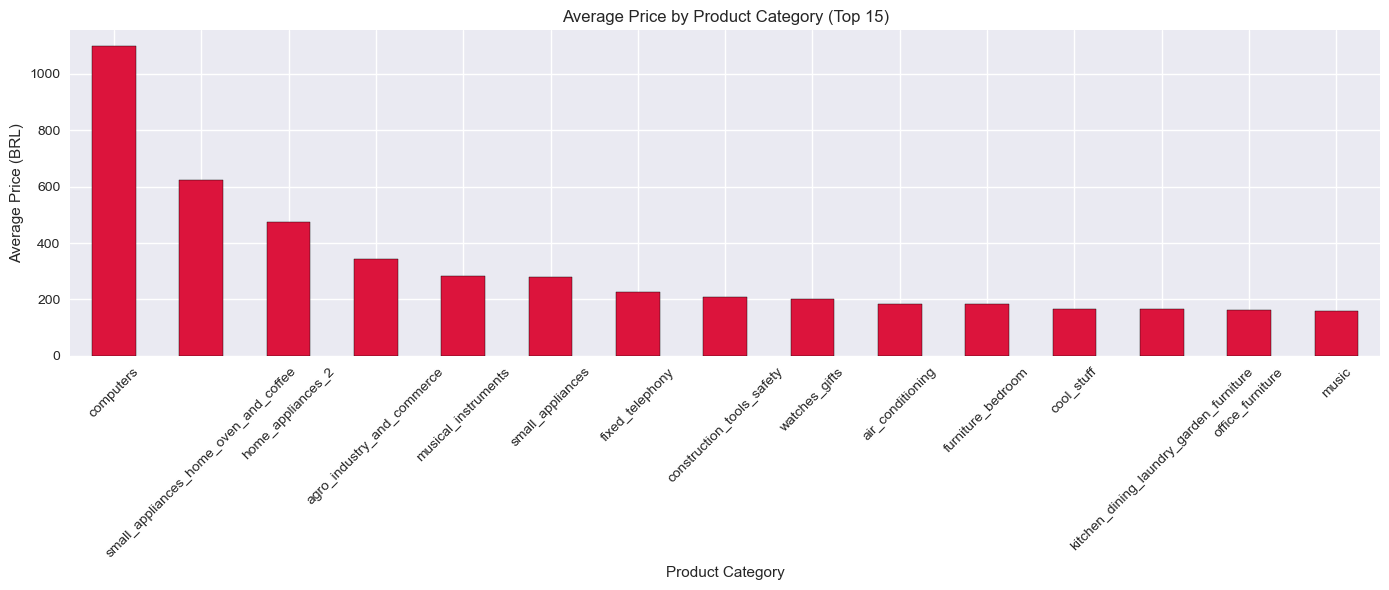

In [25]:
# Merge order_items with products to analyze price by category
# products_with_category should have product_id from the products table
order_items_with_products = order_items.merge(
    products_with_category[['product_id', 'product_category_name_english']], 
    on='product_id', 
    how='left'
)

# Average price by product category (top 15)
# Filter out NaN categories for cleaner visualization
avg_price_by_category = order_items_with_products.groupby('product_category_name_english')['price'].mean().sort_values(ascending=False).head(15)

fig, ax = plt.subplots(figsize=(14, 6))
avg_price_by_category.plot(kind='bar', ax=ax, color='crimson', edgecolor='black')
ax.set_title('Average Price by Product Category (Top 15)')
ax.set_xlabel('Product Category')
ax.set_ylabel('Average Price (BRL)')
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


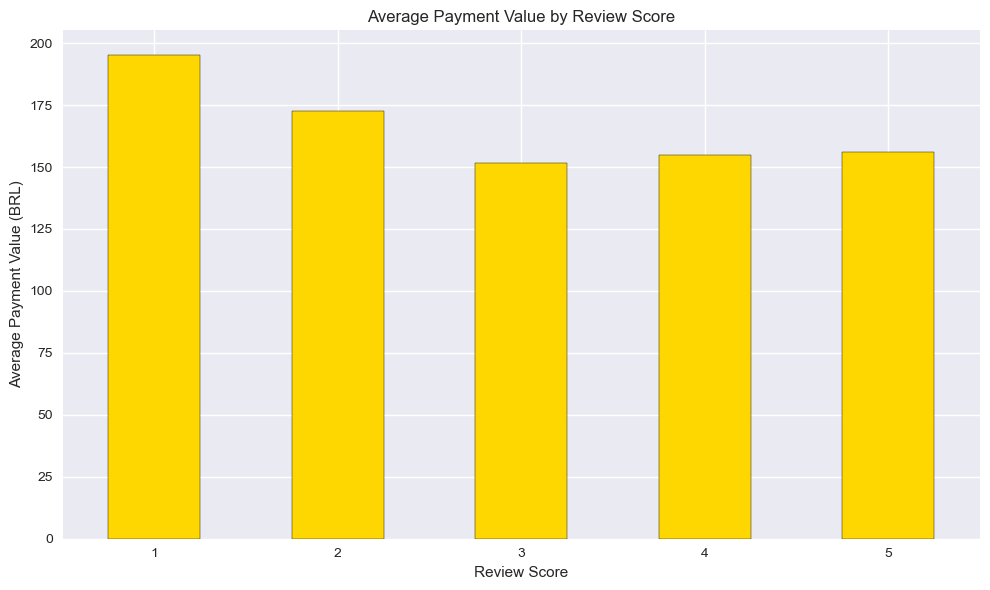

In [26]:
# Review Score vs Payment Value Analysis
# Merge reviews with payments
reviews_with_payments = order_reviews.merge(
    order_payments.groupby('order_id')['payment_value'].sum().reset_index(),
    on='order_id',
    how='left'
)

# Average payment value by review score
avg_payment_by_score = reviews_with_payments.groupby('review_score')['payment_value'].mean()

fig, ax = plt.subplots(figsize=(10, 6))
avg_payment_by_score.plot(kind='bar', ax=ax, color='gold', edgecolor='black')
ax.set_title('Average Payment Value by Review Score')
ax.set_xlabel('Review Score')
ax.set_ylabel('Average Payment Value (BRL)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()


14. GEOGRAPHIC ANALYSIS - MAP VISUALIZATIONS


In [27]:
# Prepare geographic data
# Get average coordinates for each state from geolocation data
state_coords = geolocation.groupby('geolocation_state').agg({
    'geolocation_lat': 'mean',
    'geolocation_lng': 'mean'
}).reset_index()
state_coords.columns = ['state', 'lat', 'lng']

# Count customers and sellers by state
customer_counts = customers['customer_state'].value_counts().reset_index()
customer_counts.columns = ['state', 'customer_count']

seller_counts = sellers['seller_state'].value_counts().reset_index()
seller_counts.columns = ['state', 'seller_count']

# Merge with coordinates
state_data = state_coords.merge(customer_counts, on='state', how='left')
state_data = state_data.merge(seller_counts, on='state', how='left')
state_data = state_data.fillna(0)

print("State-level geographic data prepared:")
print(state_data.head(10))


State-level geographic data prepared:
  state        lat        lng  customer_count  seller_count
0    AC  -9.702555 -68.451852              81           1.0
1    AL  -9.599729 -36.052017             413           0.0
2    AM  -3.349336 -60.537430             148           1.0
3    AP   0.086025 -51.234304              68           0.0
4    BA -13.049361 -39.560649            3380          19.0
5    CE  -4.363151 -39.004140            1336          13.0
6    DF -15.810885 -47.969630            2140          30.0
7    ES -20.105145 -40.503183            2033          23.0
8    GO -16.577645 -49.334195            2020          40.0
9    MA  -3.798997 -44.818627             747           1.0


In [28]:
# Create interactive map with Folium (if available)
if FOLIUM_AVAILABLE:
    # Create base map centered on Brazil
    brazil_map = folium.Map(
        location=[-14.2350, -51.9253],  # Center of Brazil
        zoom_start=4,
        tiles='OpenStreetMap'
    )
    
    # Add markers for each state
    for idx, row in state_data.iterrows():
        if pd.notna(row['lat']) and pd.notna(row['lng']):
            # Create popup text
            popup_text = f"""
            <b>State: {row['state']}</b><br>
            Customers: {int(row['customer_count'])}<br>
            Sellers: {int(row['seller_count'])}
            """
            
            # Determine marker color based on customer count
            if row['customer_count'] > 10000:
                color = 'red'
            elif row['customer_count'] > 5000:
                color = 'orange'
            elif row['customer_count'] > 1000:
                color = 'yellow'
            else:
                color = 'green'
            
            # Add marker
            folium.CircleMarker(
                location=[row['lat'], row['lng']],
                radius=10 + (row['customer_count'] / 1000),  # Size based on customer count
                popup=folium.Popup(popup_text, max_width=200),
                color='black',
                fill=True,
                fillColor=color,
                fillOpacity=0.6,
                tooltip=f"{row['state']}: {int(row['customer_count'])} customers"
            ).add_to(brazil_map)
    
    # Display the map
    # Alternative: If display() doesn't work, try: brazil_map.save('brazil_map.html') then open in browser
    display(brazil_map)
else:
    print("Folium not available. Install with: pip install folium")
    print("Showing alternative visualization...")


In [29]:
# Alternative: Create heatmap of customer distribution
if FOLIUM_AVAILABLE:
    # Prepare data for heatmap (sample to avoid too many points)
    heatmap_data = geolocation.sample(min(10000, len(geolocation)))[['geolocation_lat', 'geolocation_lng']].values.tolist()
    
    # Create heatmap map
    heatmap_map = folium.Map(
        location=[-14.2350, -51.9253],
        zoom_start=4,
        tiles='OpenStreetMap'
    )
    
    # Add heatmap layer
    plugins.HeatMap(heatmap_data, radius=15, blur=10, max_zoom=1).add_to(heatmap_map)
    
    display(heatmap_map)
else:
    # Alternative visualization using matplotlib
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Scatter plot of geographic coordinates
    sample_geo = geolocation.sample(min(5000, len(geolocation)))
    axes[0].scatter(sample_geo['geolocation_lng'], sample_geo['geolocation_lat'], 
                    alpha=0.1, s=1, c='blue')
    axes[0].set_xlabel('Longitude')
    axes[0].set_ylabel('Latitude')
    axes[0].set_title('Geographic Distribution of Locations')
    axes[0].grid(True, alpha=0.3)
    
    # State distribution bar chart
    top_states = state_data.nlargest(10, 'customer_count')
    axes[1].barh(top_states['state'], top_states['customer_count'], color='steelblue')
    axes[1].set_xlabel('Number of Customers')
    axes[1].set_ylabel('State')
    axes[1].set_title('Top 10 States by Customer Count')
    
    plt.tight_layout()
    plt.show()


In [30]:
# Create separate maps for customers and sellers
if FOLIUM_AVAILABLE:
    # Customer distribution map
    customer_map = folium.Map(
        location=[-14.2350, -51.9253],
        zoom_start=4,
        tiles='OpenStreetMap'
    )
    
    for idx, row in state_data.iterrows():
        if pd.notna(row['lat']) and pd.notna(row['lng']) and row['customer_count'] > 0:
            popup_text = f"<b>{row['state']}</b><br>Customers: {int(row['customer_count'])}"
            folium.CircleMarker(
                location=[row['lat'], row['lng']],
                radius=max(5, min(30, row['customer_count'] / 500)),
                popup=folium.Popup(popup_text, max_width=200),
                color='blue',
                fill=True,
                fillColor='blue',
                fillOpacity=0.6
            ).add_to(customer_map)
    
    print("Customer Distribution Map:")
    display(customer_map)


Customer Distribution Map:


In [31]:
# Seller distribution map
if FOLIUM_AVAILABLE:
    seller_map = folium.Map(
        location=[-14.2350, -51.9253],
        zoom_start=4,
        tiles='OpenStreetMap'
    )
    
    for idx, row in state_data.iterrows():
        if pd.notna(row['lat']) and pd.notna(row['lng']) and row['seller_count'] > 0:
            popup_text = f"<b>{row['state']}</b><br>Sellers: {int(row['seller_count'])}"
            folium.CircleMarker(
                location=[row['lat'], row['lng']],
                radius=max(5, min(30, row['seller_count'] / 50)),
                popup=folium.Popup(popup_text, max_width=200),
                color='green',
                fill=True,
                fillColor='green',
                fillOpacity=0.6
            ).add_to(seller_map)
    
    print("Seller Distribution Map:")
    display(seller_map)


Seller Distribution Map:


In [32]:
# Analyze sales by geographic region
# Merge orders with customers to get customer locations
orders_with_customers = orders.merge(
    customers[['customer_id', 'customer_state', 'customer_city']],
    on='customer_id',
    how='left'
)

# Merge with order items and payments to get sales value
sales_by_state = orders_with_customers.merge(
    order_payments.groupby('order_id')['payment_value'].sum().reset_index(),
    on='order_id',
    how='left'
).groupby('customer_state').agg({
    'payment_value': ['sum', 'mean', 'count']
}).reset_index()

sales_by_state.columns = ['state', 'total_sales', 'avg_order_value', 'order_count']
sales_by_state = sales_by_state.merge(state_coords, on='state', how='left')

print("Sales by State (Top 10):")
print(sales_by_state.nlargest(10, 'total_sales')[['state', 'total_sales', 'order_count', 'avg_order_value']])


Sales by State (Top 10):
   state  total_sales  order_count  avg_order_value
25    SP   5998226.96        41745       143.687315
18    RJ   2144379.69        12852       166.851828
10    MG   1872257.26        11635       160.915966
22    RS    890898.54         5466       162.989122
17    PR    811156.38         5045       160.784218
23    SC    623086.43         3637       171.318787
4     BA    616645.82         3380       182.439592
6     DF    355141.08         2140       165.953776
8     GO    350092.31         2020       173.313025
7     ES    325967.55         2033       160.338195


In [33]:
# Create sales heatmap
if FOLIUM_AVAILABLE:
    sales_map = folium.Map(
        location=[-14.2350, -51.9253],
        zoom_start=4,
        tiles='OpenStreetMap'
    )
    
    for idx, row in sales_by_state.iterrows():
        if pd.notna(row['lat']) and pd.notna(row['lng']) and pd.notna(row['total_sales']):
            popup_text = f"""
            <b>{row['state']}</b><br>
            Total Sales: R$ {row['total_sales']:,.2f}<br>
            Orders: {int(row['order_count'])}<br>
            Avg Order Value: R$ {row['avg_order_value']:,.2f}
            """
            
            # Size based on total sales
            radius = max(8, min(40, row['total_sales'] / 50000))
            
            folium.CircleMarker(
                location=[row['lat'], row['lng']],
                radius=radius,
                popup=folium.Popup(popup_text, max_width=250),
                color='darkred',
                fill=True,
                fillColor='red',
                fillOpacity=0.7,
                weight=2
            ).add_to(sales_map)
    
    # Add legend
    legend_html = '''
    <div style="position: fixed; 
                bottom: 50px; left: 50px; width: 200px; height: 120px; 
                background-color: white; z-index:9999; font-size:14px;
                border:2px solid grey; border-radius:5px; padding: 10px">
    <h4>Sales by State</h4>
    <p><i class="fa fa-circle" style="color:red"></i> Larger = More Sales</p>
    <p>Click markers for details</p>
    </div>
    '''
    sales_map.get_root().html.add_child(folium.Element(legend_html))
    
    print("Sales Distribution Map:")
    display(sales_map)
else:
    # Alternative visualization
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    top_sales = sales_by_state.nlargest(10, 'total_sales')
    axes[0].barh(top_sales['state'], top_sales['total_sales'], color='crimson')
    axes[0].set_xlabel('Total Sales (BRL)')
    axes[0].set_ylabel('State')
    axes[0].set_title('Top 10 States by Total Sales')
    axes[0].grid(True, alpha=0.3, axis='x')
    
    axes[1].barh(top_sales['state'], top_sales['avg_order_value'], color='orange')
    axes[1].set_xlabel('Average Order Value (BRL)')
    axes[1].set_ylabel('State')
    axes[1].set_title('Top 10 States by Average Order Value')
    axes[1].grid(True, alpha=0.3, axis='x')
    
    plt.tight_layout()
    plt.show()


Sales Distribution Map:
